# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [41]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

In [2]:
def chebyshev_nodes(n:int=10)-> np.ndarray:
    if isinstance(n, int) and n>=0:
        arr = np.zeros(n+1)
        for k in range(n+1):
            arr[k] = np.cos(k*np.pi/n)
        return arr
    else:
        return None
    
def bar_czeb_weights(n:int=10)-> np.ndarray:
    if isinstance(n, int) and n>=0:
        arr = np.zeros(n+1)
        for j in range(n+1):
            if j == 0 or j == n:
                dj = 0.5
                arr[j] = (-1)**j * dj
            elif j > 0 and j < n:
                dj = 1
                arr[j] = (-1)**j * dj
            else:
                return None
        return arr
    else:
        return None

Zdefiniowano funkcję chebyshev_nodes, która tworzy wektor zawierający węzły Czebyszewa, oraz funkcję bar_czeb_weights, która tworzy wektor wag dla węzłów Czebyszewa.

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [31]:
f1 = lambda x: np.sign(x) * x + x ** 2

f2 = lambda x: np.sign(x) * x ** 2

f3 = lambda x: (np.abs(np.sin(5 * x))) ** 3

f41 = lambda x: 1 / (1 + 1 * x ** 2)
f425 = lambda x: 1 / (1 + 25 * x ** 2)
f4100 = lambda x: 1 / (1 + 100 * x ** 2)

f5 = lambda x: np.sign(x)

Przy pomocy wyrażeń lambda, zdefiniowano zdane funkcje.

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

In [4]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 1e1
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

TypeError: 'float' object cannot be interpreted as an integer

In [42]:
def  barycentric_inte(xi:np.ndarray,yi:np.ndarray,wi:np.ndarray,x:np.ndarray)-> np.ndarray:
    if isinstance(xi, np.ndarray) and isinstance(yi, np.ndarray) and isinstance(wi, np.ndarray) and isinstance(x, np.ndarray):
        if xi.shape == yi.shape and yi.shape == wi.shape:
            Y = []
            L = wi/(x-xi)
            Y.append(yi @ L / sum(L))
            Y = np.array(Y)
            return Y
    else:
        return None

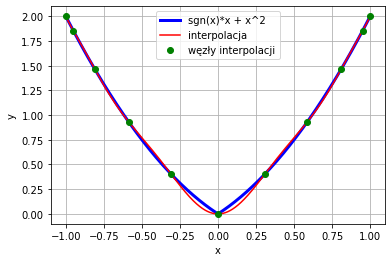

In [43]:
# Interpolacja rzędu 10

x = np.linspace(-1+1e-5,1-1e-5,1001)
weights = main.bar_czeb_weights(10)
node_x = main.chebyshev_nodes(10)
node_y = f1(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)
plt.plot(x, f1(x) ,'b',  linewidth=3 ,label = 'sgn(x)*x + x^2')
plt.plot(x,yinp,'r',label = 'interpolacja')
plt.plot(node_x, node_y,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

quality10 = main.L_inf(f1(x), yinp)

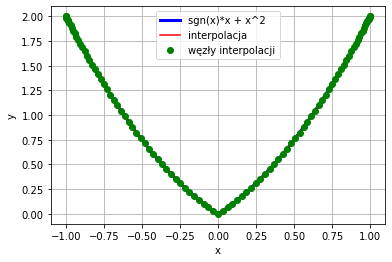

In [44]:
# Interpolacja rzędu 100

x = np.linspace(-1+1e-5,1-1e-5,1001)
weights = main.bar_czeb_weights(100)
node_x = main.chebyshev_nodes(100)
node_y = f1(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)
plt.plot(x, f1(x) ,'b',  linewidth=3 ,label = 'sgn(x)*x + x^2')
plt.plot(x,yinp,'r',label = 'interpolacja')
plt.plot(node_x, node_y,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

quality100 = main.L_inf(f1(x), yinp)

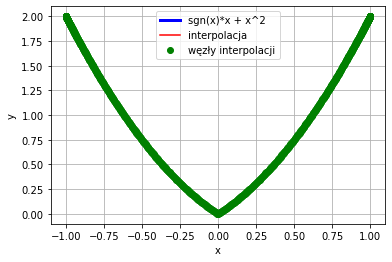

In [45]:
# Interpolacja rzędu 1000

x = np.linspace(-1+1e-5,1-1e-5,1001)
weights = main.bar_czeb_weights(1000)
node_x = main.chebyshev_nodes(1000)
node_y = f1(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)
plt.plot(x, f1(x) ,'b',  linewidth=3 ,label = 'sgn(x)*x + x^2')
plt.plot(x,yinp,'r',label = 'interpolacja')
plt.plot(node_x, node_y,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

quality1000 = main.L_inf(f1(x), yinp)

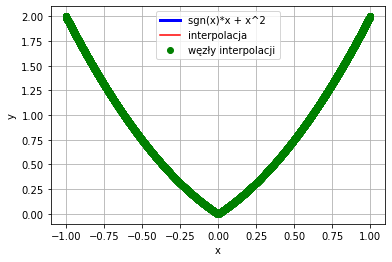

In [46]:
# Interpolacja rzędu 10000

x = np.linspace(-1+1e-5,1-1e-5,1001)
weights = main.bar_czeb_weights(10000)
node_x = main.chebyshev_nodes(10000)
node_y = f1(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)
plt.plot(x, f1(x) ,'b',  linewidth=3 ,label = 'sgn(x)*x + x^2')
plt.plot(x,yinp,'r',label = 'interpolacja')
plt.plot(node_x, node_y,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

quality10000 = main.L_inf(f1(x), yinp)

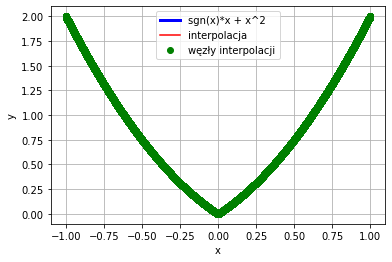

In [47]:
# Interpolacja rzędu 100000

x = np.linspace(-1+1e-5,1-1e-5,1001)
weights = main.bar_czeb_weights(100000)
node_x = main.chebyshev_nodes(100000)
node_y = f1(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)
plt.plot(x, f1(x) ,'b',  linewidth=3 ,label = 'sgn(x)*x + x^2')
plt.plot(x,yinp,'r',label = 'interpolacja')
plt.plot(node_x, node_y,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

quality100000 = main.L_inf(f1(x), yinp)

Zdefiniowano funkcję barycentric_inte, która przeprowadza interpolację metodą barycentryczną dla zadanych węzłów xi i wartości funkcji interpolowanej yi, używając wag wi. Przy jej pomocy dokonano interpolacji funkcji f2 (różniczkowalnej jednokrotnie) z zadania 2. Wykonano w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000 oraz 100000. Wykreślono wykresy obrazujące wyniki interpolacji, wraz z bazową funkcją oraz węzłami. 

W zależności od rzędu interpolacji, czas wykonywania obliczeń znacznie się różnił. Dla rzędów 10 - 1000 czas ten był bardzo krótki i trwał ułamki sekund. W przypadku rzędu 10000, czas ten już przekroczył 1 sekundę. Natomiast w przypadku rzędu 100000 czas ten już dochodził do kilku/kilkunastu sekund.


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [59]:
from typing import Union, List, Tuple

def L_inf(xr:Union[int, float, List, np.ndarray],x:Union[int, float, List, np.ndarray])-> float:
    
    if isinstance(xr, (int, float)) and isinstance(x, (int, float)):
        return np.abs(xr - x)

    if isinstance(xr, List) and isinstance(x, List):
        return np.abs(max(xr) - max(x))

    if isinstance(xr, np.ndarray) and isinstance(x, np.ndarray):
        if xr.shape == x.shape:
            return max(np.abs(xr - x))
        else:
            return np.NaN
    else:
        return np.NaN   

print(quality10)
print(quality100)
print(quality1000)
print(quality10000)
print(quality100000)

0.05921920257188863
0.005954538790202411
0.0004606668203118694
7.085232752850404e-06
6.865199828932911e-08


Zdefiniowano funkcję L_inf, która oblicza normę L nieskończoność. Za jej pomocą zbadano jakość przeprowadzonych wyżej interpolacji. Im wyższy rząd, tym jakość interpolacji jest lepsza, ale kosztem dłuższego czasu wykonywania się obliczeń.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

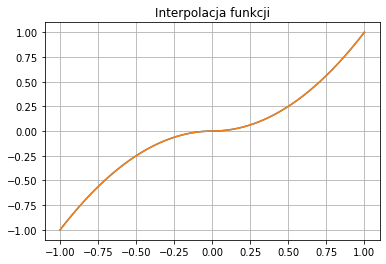

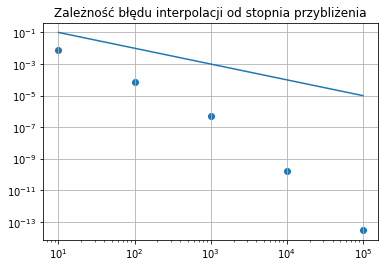

In [50]:
x = np.linspace(-1+1e-5,1-1e-5,1001)
y = f2(x)
norm = list()
n = [10, 100, 1000, 10000, 100000]
fun = list()

for i in n:
    weights = main.bar_czeb_weights(i)
    node_x = main.chebyshev_nodes(i)
    node_y = f2(node_x)
    yinp = main.barycentric_inte(node_x, node_y, weights, x)
    norm.append(main.L_inf(y, yinp))
    fun.append(1 / i) 

plt.plot(x, y)
plt.plot(x, yinp)
plt.title("Interpolacja funkcji")
plt.grid()
plt.show()

plt.scatter(n, norm)
plt.plot(n, fun)
plt.xscale("log")
plt.yscale("log")
plt.title("Zależność błędu interpolacji od stopnia przybliżenia")
plt.grid()
plt.show()




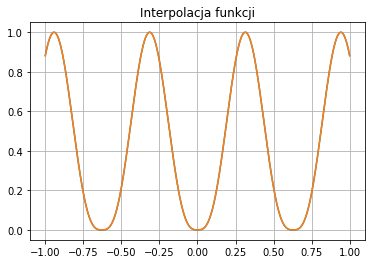

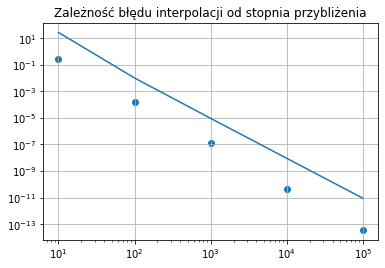

In [51]:
x = np.linspace(-1+1e-5,1-1e-5,1001)
y = f3(x)
norm = list()
n = [10, 100, 1000, 10000, 100000]
fun = list()
V = 2.102e4

for i in n:
    weights = main.bar_czeb_weights(i)
    node_x = main.chebyshev_nodes(i)
    node_y = f3(node_x)
    yinp = main.barycentric_inte(node_x, node_y, weights, x)
    norm.append(main.L_inf(y, yinp))
    fun.append(4*V/3/np.pi/(i-3)**3)


plt.plot(x, y)
plt.plot(x, yinp)
plt.title("Interpolacja funkcji")
plt.grid()
plt.show()

plt.scatter(n, norm)
plt.plot(n, fun)
plt.xscale("log")
plt.yscale("log")
plt.title("Zależność błędu interpolacji od stopnia przybliżenia")
plt.grid()
plt.show()


W celu przeanalizowania jakości interpolacji w zależności od n, wyliczono wartośi funkcji i wielomianu interpolacyjnego w 1000 punktch i wyliczono normę błędu dla każdego badanego rzędu. Dla każdej z funkcji sporządzono wykres w skali podwójnie logarytmicznej, w którym oś argumentów to rząd interpolacji, a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieszczono na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji.

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

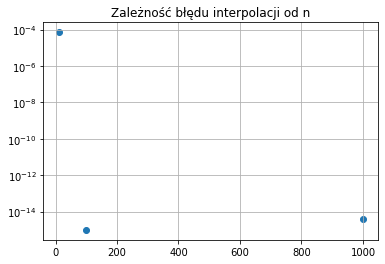

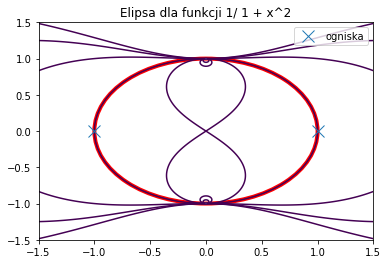

In [53]:
x = np.linspace(-1+1e-5,1-1e-5,1001)
y = f41(x)
norm = list()
n = [10, 100, 1000]

for i in n:
    weights = main.bar_czeb_weights(i)
    node_x = main.chebyshev_nodes(i)
    node_y = f41(node_x)
    yinp = main.barycentric_inte(node_x, node_y, weights, x)
    norm.append(main.L_inf(y, yinp))

plt.scatter(n, norm)
plt.yscale("log")
plt.title("Zależność błędu interpolacji od n")
plt.grid()
plt.show()

x1 = np.linspace(-1.5, 1.5, 1000)
y1 = np.linspace(-1.5, 1.5, 1000)
X, Y = np.meshgrid(x1, y1)
Z = f41(X + 1j * Y)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=1
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='r', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa dla funkcji 1/ 1 + x^2")
ax.legend()
plt.show()


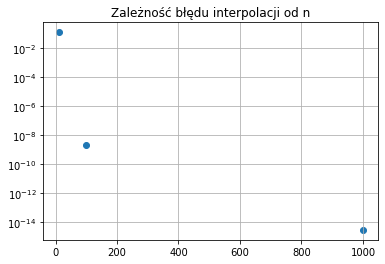

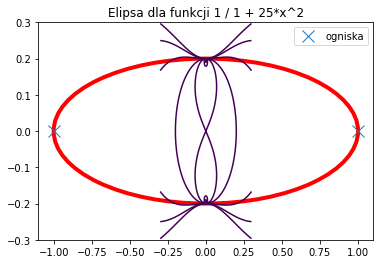

In [55]:
x = np.linspace(-1+1e-5,1-1e-5,1001)
y = f425(x)
norm = list()
n = [10, 100, 1000]

for i in n:
    weights = main.bar_czeb_weights(i)
    node_x = main.chebyshev_nodes(i)
    node_y = f425(node_x)
    yinp = main.barycentric_inte(node_x, node_y, weights, x)
    norm.append(main.L_inf(y, yinp))

plt.scatter(n, norm)
plt.yscale("log")
plt.title("Zależność błędu interpolacji od n")
plt.grid()
plt.show()

x1 = np.linspace(-0.3, 0.3, 1000)
y2 = np.linspace(-0.3, 0.3, 1000)
X, Y = np.meshgrid(x1, y2)
Z = 1 / (1 + 25 * (X + 1j * Y)**2)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=0.2
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='r', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa dla funkcji 1 / 1 + 25*x^2")
ax.legend()
plt.show()

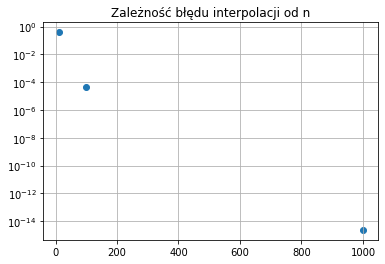

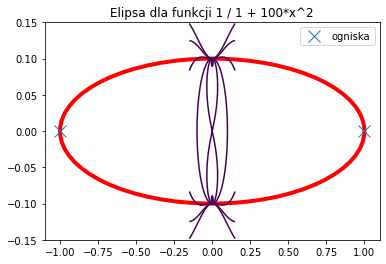

In [57]:
x = np.linspace(-1+1e-5,1-1e-5,1001)
y = f4100(x)
norm = list()
n = [10, 100, 1000]

for i in n:
    weights = main.bar_czeb_weights(i)
    node_x = main.chebyshev_nodes(i)
    node_y = f4100(node_x)
    yinp = main.barycentric_inte(node_x, node_y, weights, x)
    norm.append(main.L_inf(y, yinp))

plt.scatter(n, norm)
plt.yscale("log")
plt.title("Zależność błędu interpolacji od n")
plt.grid()
plt.show()

x1 = np.linspace(-0.15, 0.15, 1000)
y2 = np.linspace(-0.15, 0.15, 1000)
X, Y = np.meshgrid(x1, y2)
Z = 1 / (1 + 100 * (X + 1j * Y)**2)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=0.1
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='r', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa dla funkcji 1 / 1 + 100*x^2")
ax.legend()
plt.show()

Przeprowadzono podobną analizę jak w zadaniu 6. Wykres sporządzono w skali pół logarytmicznej, tylko na osi y. Dla porównania umieszczono na wykresie oszacowanie dla interpolacji funkcji analitycznych. W tym celu wyliczono maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

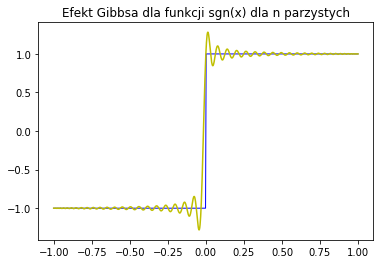

1.9052098680510547


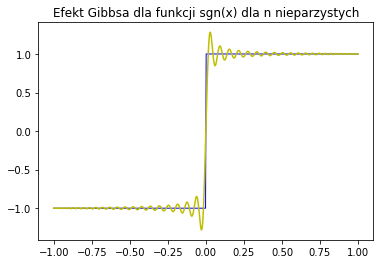

0.8504007885001584


In [58]:
x = np.linspace(-1+1e-5,1-1e-5,1001)
y = f5(x)
n1 = 100
n2 = 101

weights = main.bar_czeb_weights(n1)
node_x = main.chebyshev_nodes(n1)
node_y = f5(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)

plt.plot(x, y, linewidth=1, color="b")
plt.title("Efekt Gibbsa dla funkcji sgn(x) dla n parzystych")
plt.plot(x, yinp, "y")
plt.show()
print(main.L_inf(y, yinp))

weights = main.bar_czeb_weights(n2)
node_x = main.chebyshev_nodes(n2)
node_y = f5(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)

plt.plot(x, y, linewidth=1, color="b")
plt.title("Efekt Gibbsa dla funkcji sgn(x) dla n nieparzystych")
plt.plot(x, yinp, "y")
plt.show()
print(main.L_inf(y, yinp))

Dla funkcji nieciągłej z zadania 2 przeanalizowano efekt Gibbsa dla parzystych oraz nieparzystych n. Obliczono, jaki jest minimalny błąd niezależny od rzędu. Wykonano wykres funkcji oraz jej funkcji interpolującej dla parzystych oraz nieparzystych n.

Wnioski:

Ćwiczenia umożliwiły zapoznanie się z interpolacją funkcji metodą barycentryczną, wykorzystującą wagi oraz węzły Czebyszewa. Pozwoliły one również dokładniejsze zrozumienie czym jest interpolacja, oraz jak ją wykorzystywać w praktyce. Dzięki ćwiczeniom można było się przekonać, że dokładność interpolacji zależy od jej rzędu. Im jest on wyższy, tym interpolacja jest dokładniejsza, jednak dzieje się to kosztem czasu, jaki program musi poświęcić na wykonywanie obliczeń. Utrwalono także wiedzę o efekcie Gibbsa.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)